# Transfer Learning using Keras and Mobilenet# 

Keras is a high level API that uses Tensorflow as its backend. It makes it easier to train models. This notebook imports Mobilenet with weights from the Imagenet dataset. [Here](http://image-net.org/challenges/LSVRC/2012/browse-synsets) are the categories the model is trained on. Then, we use transfer learning on the last few layers to classify recyclables and trash. 

This notebook is adapted from this [guide](https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299) and its [github repo](https://github.com/ferhat00/Deep-Learning/tree/master/Transfer%20Learning%20CNN).

Load the necessary packages and libraries. By using Docker and the pre-made image, we save on importing `keras`,`tensorflow`,`protobuf`, and `np-utils` from `pip`, as well as getting the correct python version. Also, `google_images_download` (used later) works now. Maybe `seaborn` will work too?

In [1]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [2]:
path = '/home/jovyan/work/power_mgmt_infra/src/sorter/keras/'

We shall be using Mobilenet as it is lightweight
<img src="files/MobileNet architecture.png">


It is also very low maintence.
<img src="files/mobilenet_v1.png">

Source paper located here: https://arxiv.org/pdf/1704.04861.pdf
MobileNets: Efficient Convolutional Neural Networks for Mobile Vision
Applications, Howard et al, 2017


In [3]:
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [4]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Lets try some tests on images of different breed of dogs

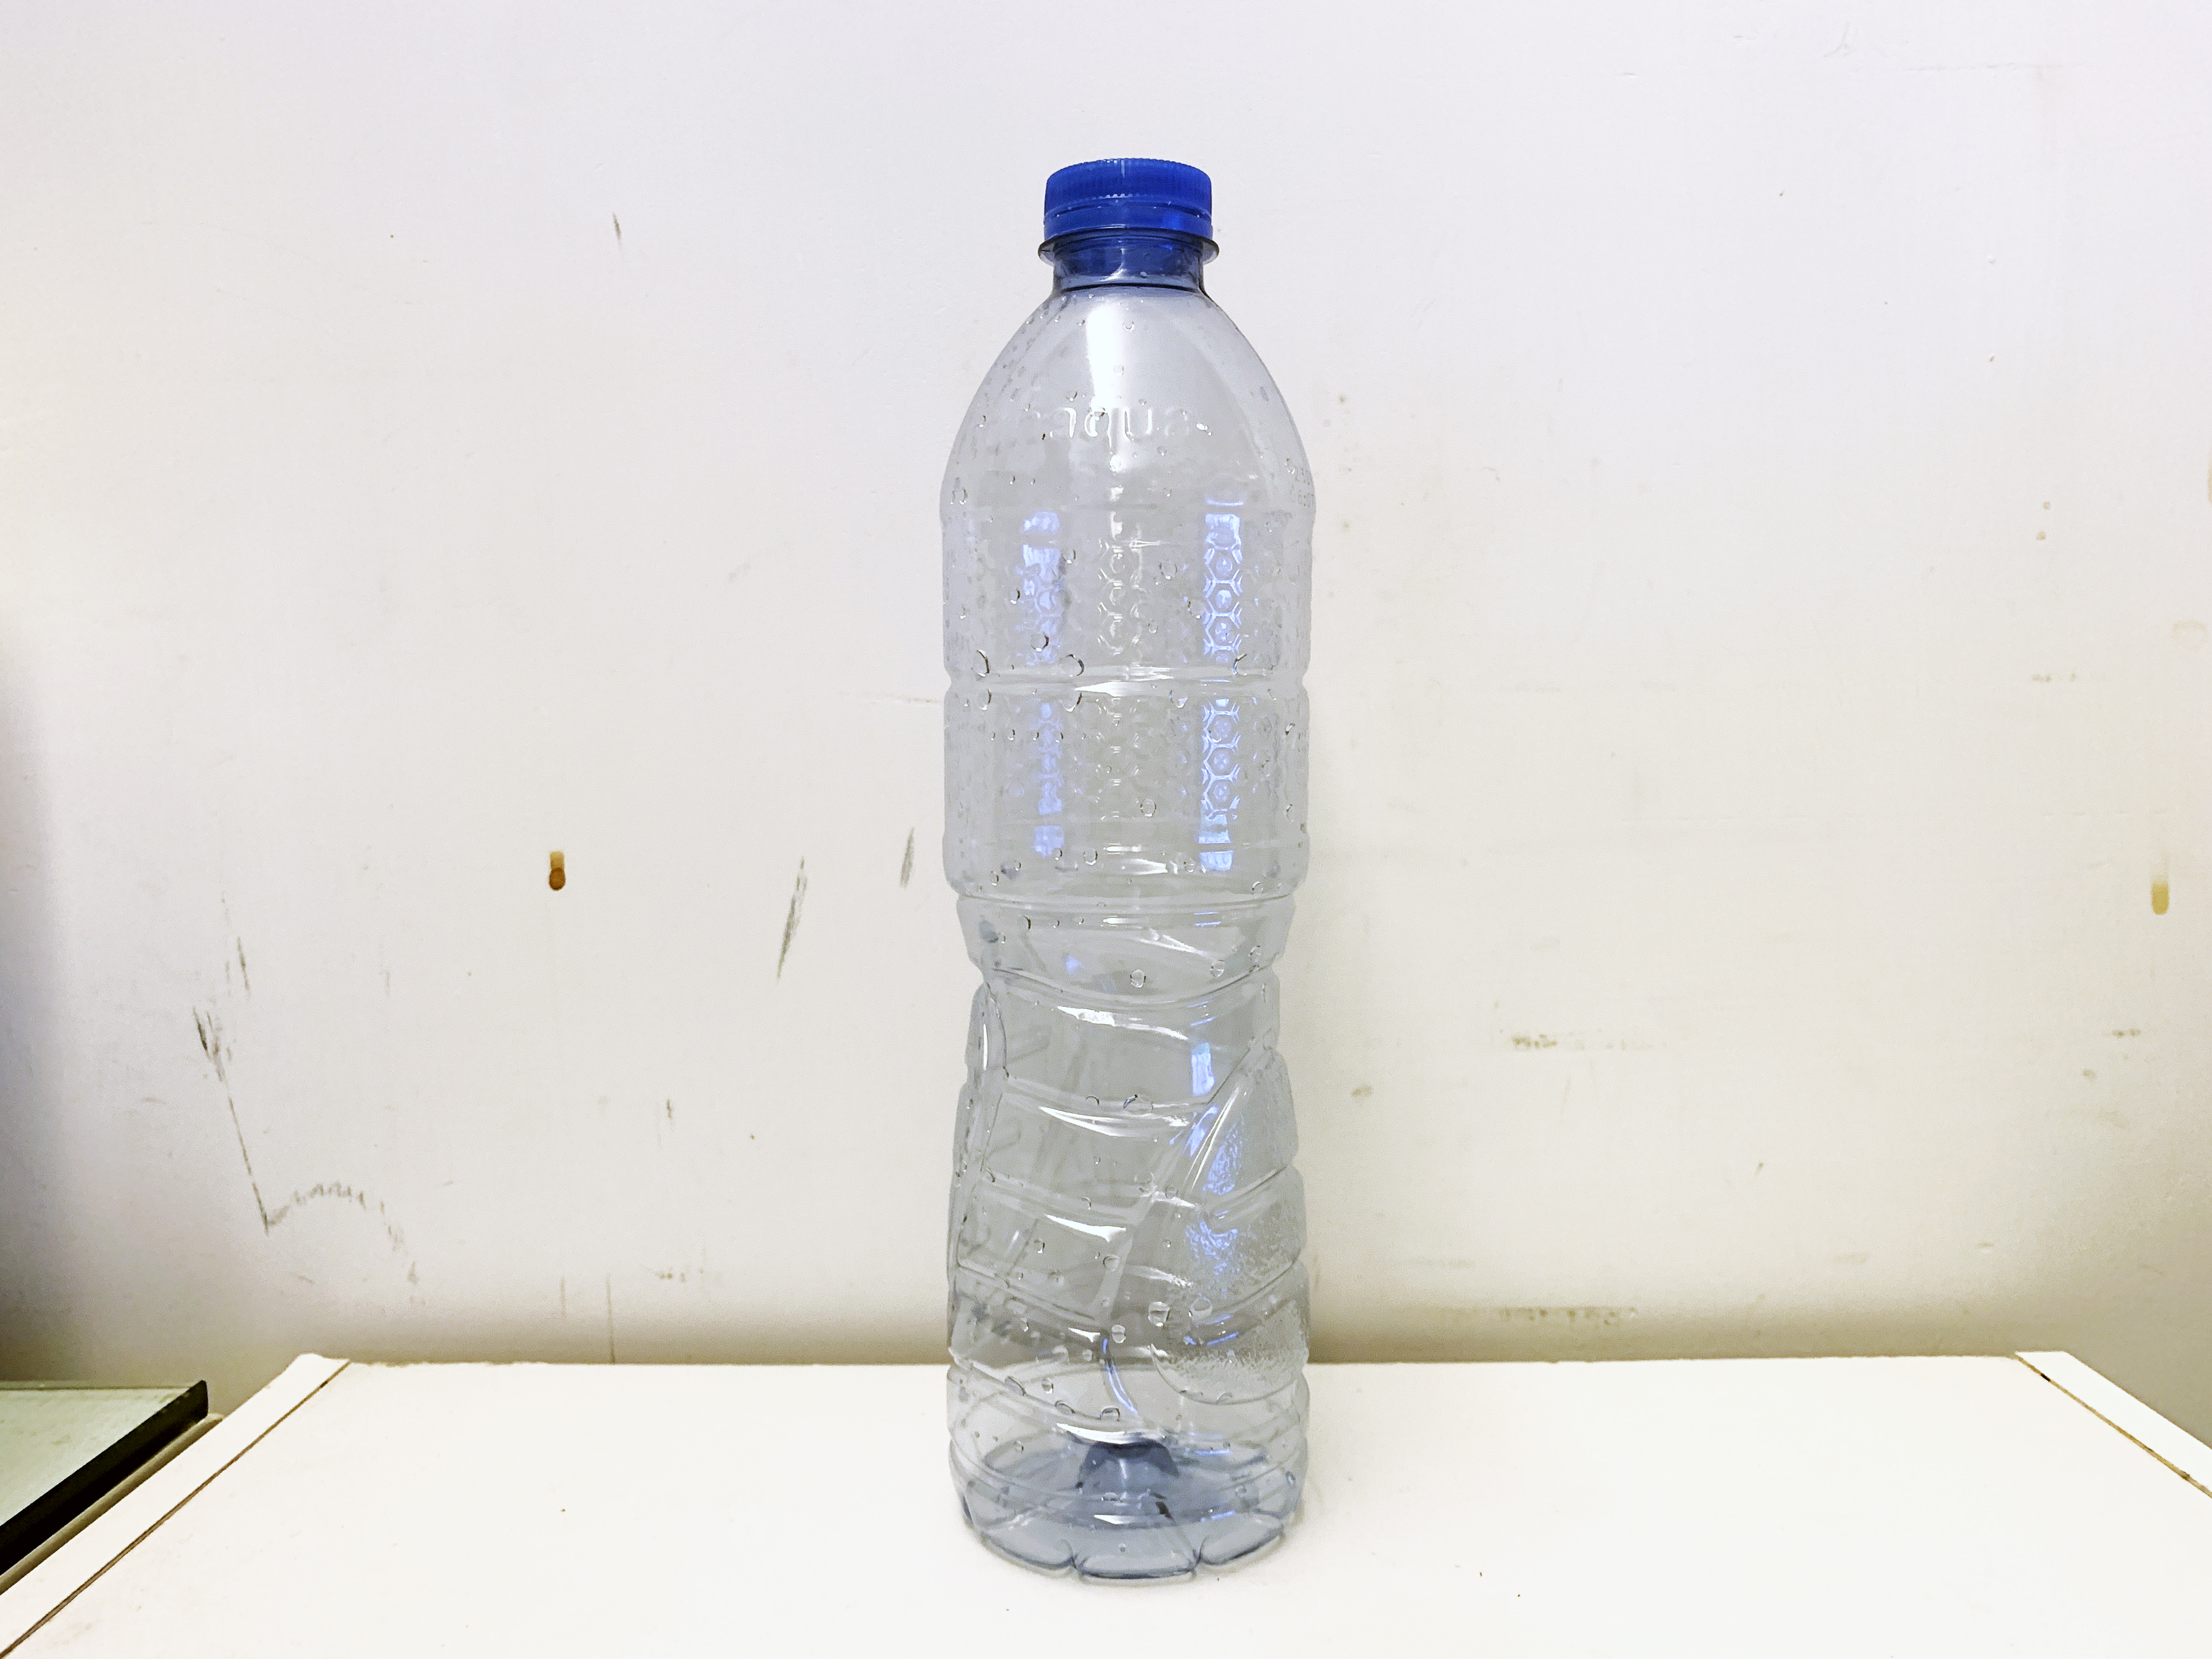

In [5]:
Image(filename='bottle.jpg') 

In [6]:
preprocessed_image = prepare_image('bottle.jpg')
#preprocessed_image = prepare_image('tin_can.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 1us/step


[[('n04557648', 'water_bottle', 0.8581345),
  ('n03983396', 'pop_bottle', 0.12316564),
  ('n02783161', 'ballpoint', 0.005774174),
  ('n02823428', 'beer_bottle', 0.0024186587),
  ('n03825788', 'nipple', 0.0023768365)]]

Lets now manipulate the top few layers and employ transfer learning. To do this, we need to train it on some images. But rather than manually downloading images of them, lets use Google Image Search and pull the images. To do this, there is a nice package we can import.

Check out https://github.com/hardikvasa/google-images-download

Google recently changed the format that images are web scraped, so the pip package is out of date. Use PR branch from Github  
`!pip install git+https://github.com/voins/google-images-download.git@patch-1`  
or use my fork:  
`!pip3 install git+https://github.com/jonlee48/google-images-download.git@patch-1`

In [7]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

Add training labels. Separate phrases using "_"

In [8]:
labels = ["metal_can","glass_bottle","newspaper","cardboard","water_bottle","fast_food_packaging"]

In [10]:
for i in range(len(labels)):
    arguments = {"keywords":labels[i],"limit":100,"print_urls":True,"format":"jpg", "size":">400*300"} 
    paths = response.download(arguments)


Item no.: 1 --> Item name = metal_can
Evaluating...
Starting Download...
Image URL: https://static.grainger.com/rp/s/is/image/Grainger/437H99_AS01?$zmmain$
Completed Image ====> 1.437h99_as01.jpg
Image URL: https://images.uline.com/is/image/content/dam/images/S/S13000/S-12980.jpg?$Mobile_SI$&iccEmbed=1&icc=AdobeRGB
Completed Image ====> 2.s-12980.jpg.webp
Image URL: https://bascousa.com/pub/media/catalog/product/cache/631b31def7b06ff34503b0486c7645e1/1/-/1-gallon-f-style-oblong-screw-top-metal-can-mf128ul-175.jpg
Completed Image ====> 3.1-gallon-f-style-oblong-screw-top-metal-can-mf128ul-175.jpg
Image URL: https://cdn.mscdirect.com/global/images/ProductImages/3950358-21.jpg
Completed Image ====> 4.3950358-21.jpg.webp
Image URL: https://img3.stockfresh.com/files/b/boroda/m/21/255222_stock-photo-single-metal-can.jpg
Completed Image ====> 5.255222_stock-photo-single-metal-can.jpg
Image URL: https://bascousa.com/pub/media/catalog/product/cache/631b31def7b06ff34503b0486c7645e1/1/-/1-gallon

Completed Image ====> 44.depositphotos_10890027-stock-photo-metal-can-1.jpg
Image URL: https://s.yimg.com/aah/yhst-136855901154854/sc-1-slip-cover-can-1-lb-15.gif
Completed Image ====> 45.sc-1-slip-cover-can-1-lb-15.gif.jpg
Image URL: https://i.pinimg.com/474x/16/92/46/1692462603909cb23e9213223ee55d1f.jpg
Completed Image ====> 46.1692462603909cb23e9213223ee55d1f.jpg
Image URL: https://cdn2.vectorstock.com/i/1000x1000/85/61/realistic-detailed-3d-white-blank-spray-metal-can-vector-28388561.jpg
Completed Image ====> 47.realistic-detailed-3d-white-blank-spray-metal-can-vector-28388561.jpg
Image URL: https://ctl.s6img.com/society6/img/47S8Ni40b8nYpODAeRO0GW4xeLA/w_700/can-coolers/12oz/center/~artwork,fw_3085,fh_1280,fy_-32,iw_3082,ih_1340/s6-original-art-uploads/society6/uploads/misc/7a4e094e40534c00ad45498b6a985d2d/~~/woke-up-to-the-sweet-sound-of-heavy-metal-can-coolers.jpg
Completed Image ====> 48.woke-up-to-the-sweet-sound-of-heavy-metal-can-coolers.jpg
Image URL: https://www.nationalfu

Completed Image ====> 86.cs-metalcan-designstudie_g.jpg
Image URL: https://cdn-1.us.xmsymphony.com/4618d840d13c58c0371fae75c39d9130/contents/176321/176321.jpg
Completed Image ====> 87.176321.jpg
Image URL: https://comps.canstockphoto.com/aluminum-cans-blank-metal-can-drinks-image_csp69033374.jpg
Completed Image ====> 88.aluminum-cans-blank-metal-can-drinks-image_csp69033374.jpg
Image URL: https://secure.img1-fg.wfcdn.com/im/16373388/resize-h800-w800%5Ecompr-r85/1145/114539329/Bazine+Open+Drink+Repeat+Wood+and+Metal+Can+Container.jpg
Completed Image ====> 89.bazine+open+drink+repeat+wood+and+metal+can+container.jpg
Image URL: https://image.shutterstock.com/z/stock-photo-metal-can-for-preserved-food-on-white-background-clipping-path-inside-179873900.jpg
Completed Image ====> 90.stock-photo-metal-can-for-preserved-food-on-white-background-clipping-path-inside-179873900.jpg
Image URL: https://image.made-in-china.com/202f0j00ItHUfEazBZus/Round-Packaging-Tin-Metal-Can.jpg
Completed Image ===

Completed Image ====> 34.heritage-beer-amber-glass-bottle-psd-mockup.jpg
Image URL: https://m.media-amazon.com/images/I/41lc4zmtooL.jpg
Completed Image ====> 35.41lc4zmtool.jpg
Image URL: https://i.ytimg.com/vi/eCBidterCTk/hqdefault.jpg
Completed Image ====> 36.hqdefault.jpg
Image URL: https://www.ikea.com/gb/en/images/products/ikea-365--carafe-with-stopper-clear-glass-cork__0711284_PE728122_S5.JPG?f=xs
Completed Image ====> 37.ikea-365--carafe-with-stopper-clear-glass-cork__0711284_pe728122_s5.jpg.webp
Image URL: https://shop.googlemerchandisestore.com/store/20160512512/assets/items/images/GGOEGDHJ116899.jpg
Completed Image ====> 38.ggoegdhj116899.jpg
Image URL: https://www.nzherald.co.nz/resizer/BPB-TakQYA4YC3KrfJXT2sh4n20=/360x384/filters:quality(70)/cloudfront-ap-southeast-2.images.arcpublishing.com/nzme/V4FHXORUANEG3BFWMFPWHBJR24.jpg
Completed Image ====> 39.v4fhxoruaneg3bfwmfpwhbjr24.jpg.webp
Image URL: https://23pxcp3u31lgiybw92v8rma1-wpengine.netdna-ssl.com/wp-content/uploads/2

Completed Image ====> 79.81bgydmplyl._ac_sl1500_.jpg
Image URL: https://i.ytimg.com/vi/MfOGcN9UHJs/maxresdefault.jpg
Completed Image ====> 80.maxresdefault.jpg
Image URL: https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&poi=face&w=1200&h=1200&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F9%2F2019%2F04%2FEllo-Devon-Glass-Water-Bottles-XL-BLOG0419.jpg
Completed Image ====> 81.image.jpg
Image URL: https://weedseedshop.com/blog/wp-content/uploads/How-to-Make-Your-Own-Bong.jpg
Completed Image ====> 82.how-to-make-your-own-bong.jpg
Image URL: https://cdnimg.webstaurantstore.com/images/products/large/397363/1461471.jpg
Completed Image ====> 83.1461471.jpg
Image URL: https://images.immediate.co.uk/production/volatile/sites/4/2018/07/GettyImages-84588407-f290ded.jpg?quality=90&crop=4px%2C0px%2C931px%2C401px&resize=931%2C396
Completed Image ====> 84.gettyimages-84588407-f290ded.jpg
Image URL: https://teja12.kuikr.com/is/p/f/800x600/guide/wp-content/uploads/2020/02/bot

Completed Image ====> 30._7004906.jpg
Image URL: https://www.washingtonpost.com/resizer/vBBCzRsq7Nj2srKNC76wk8yfsIw=/arc-anglerfish-washpost-prod-washpost/public/JB22DBSPIMI6VNZBT5GNZEF4DQ.jpg
Completed Image ====> 31.jb22dbspimi6vnzbt5gnzef4dq.jpg
Image URL: https://media1.fdncms.com/sevendaysvt/imager/u/original/30001528/waterbury_record.jpg
Completed Image ====> 32.waterbury_record.jpg
Image URL: https://www.niemanlab.org/images/youngstown-vindicator-dark.jpg
Completed Image ====> 33.youngstown-vindicator-dark.jpg
Image URL: https://image.shutterstock.com/image-photo/business-newspaper-isolated-on-white-600w-1272343108.jpg
Completed Image ====> 34.business-newspaper-isolated-on-white-600w-1272343108.jpg.webp
Image URL: https://www.vpr.org/sites/vpr/files/styles/x_large/public/202003/Rutland-Herald-vpr-keck-20200320.jpg
Completed Image ====> 35.rutland-herald-vpr-keck-20200320.jpg
Image URL: https://i.pinimg.com/originals/d5/19/da/d519dabdeafb9a226838c7eaece06360.jpg
Completed Image 

Completed Image ====> 79.1982.09.15_usa_today.jpg
Image URL: http://www.tombstoneepitaph.com/media/images/additional_photos/tombstone_epitaph_postcard.jpg
Completed Image ====> 80.tombstone_epitaph_postcard.jpg
Image URL: https://www.sltrib.com/resizer/HdQr40IwMB3Iw9q7TRaMPCZnkRE=/0x600/smart/filters:quality(86)/arc-anglerfish-arc2-prod-sltrib.s3.amazonaws.com/public/6NTJ7KLJEFCC7PI3OCEKL2Q3E4.jpg
Completed Image ====> 81.6ntj7kljefcc7pi3ocekl2q3e4.jpg.webp
Image URL: https://dmn-dallas-news-prod.cdn.arcpublishing.com/resizer/GYI9fXYihjHAEDDIKJ50nAJZ9FI=/1660x934/smart/filters:no_upscale()/arc-anglerfish-arc2-prod-dmn.s3.amazonaws.com/public/7FZURNFABVGKBF76452ZH5GO74.jpg
Completed Image ====> 82.7fzurnfabvgkbf76452zh5go74.jpg
Image URL: https://g.foolcdn.com/editorial/images/471519/print-newspaper.jpg
Completed Image ====> 83.print-newspaper.jpg
Image URL: https://9b16f79ca967fd0708d1-2713572fef44aa49ec323e813b06d2d9.ssl.cf2.rackcdn.com/1140x_a10-7_cTC/PostGazettenewspaper3-1585327715

Completed Image ====> 22.utb8weuhoyamiujk43ptq6ysmxxae.jpg_350x350.jpg
Image URL: https://assets.petco.com/petco/image/upload/f_auto,q_auto/2365388-right-1
Completed Image ====> 23.2365388-right-1.jpg
Image URL: https://images.homedepot-static.com/productImages/9fc7af8c-77a1-4383-8c17-1a9e4ca0c52d/svn/the-home-depot-moving-boxes-1001016-64_1000.jpg
Completed Image ====> 24.the-home-depot-moving-boxes-1001016-64_1000.jpg
Image URL: https://blog.customboxesnow.com/wp-content/uploads/2019/07/double_wall_corrugated_1000x664-624x414.jpg
Completed Image ====> 25.double_wall_corrugated_1000x664-624x414.jpg
Image URL: https://previews.123rf.com/images/ozaiachin/ozaiachin1201/ozaiachin120100214/11776298-piles-of-cardboard-boxes-on-a-white-background.jpg
Completed Image ====> 26.11776298-piles-of-cardboard-boxes-on-a-white-background.jpg
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Box.agr.jpg/1200px-Box.agr.jpg
Completed Image ====> 27.1200px-box.agr.jpg
Image URL: https

Completed Image ====> 69.corrugated_manufacturing_usa_canada_global_shippling_company-1236x730.jpg
Image URL: https://img.pixers.pics/pho_wat(s3:700/FO/40/91/44/92/700_FO40914492_4e0c880e463e5fcb55f413c00096330b.jpg,700,515,cms:2018/10/5bd1b6b8d04b8_220x50-watermark.png,over,480,465,jpg)/wall-murals-seamless-cardboard-texture.jpg.jpg
Completed Image ====> 70.wall-murals-seamless-cardboard-texture.jpg.jpg
Image URL: https://ae01.alicdn.com/kf/HTB16_4.tyMnBKNjSZFzq6A_qVXaB/Virtual-reality-DIY-Cardboard-3D-VR-Glasses-Paper-Virtual-Reality-Goggles-3D-Glasses-Smartphone-Helmet-Headset.jpg
Completed Image ====> 71.virtual-reality-diy-cardboard-3d-vr-glasses-paper-virtual-reality-goggles-3d-glasses-smartphone-helmet-headset.jpg
Image URL: https://d27ucmmhxk51xv.cloudfront.net/media/english/illustration/cardboard.jpg?version=1.2.4
Completed Image ====> 72.cardboard.jpg
Image URL: https://cdn1.vectorstock.com/i/1000x1000/30/90/open-cartoon-flat-cardboard-box-on-white-vector-23493090.jpg
Complet

Completed Image ====> 15.breakaway_ridge_24oz_blue_1080px_web_1024x1024.jpg
Image URL: https://pyxis.nymag.com/v1/imgs/d38/519/101d831bd5bca678eb8635173af9a42e3a-nalgene-tritan-widemouth-1-quart-bottle-.rsquare.w600.jpg
Completed Image ====> 16.101d831bd5bca678eb8635173af9a42e3a-nalgene-tritan-widemouth-1-quart-bottle-.rsquare.w600.jpg
Image URL: https://www.ikea.com/us/en/images/products/ikea-365--water-bottle-green__0712764_PE728998_S5.JPG
Completed Image ====> 17.ikea-365--water-bottle-green__0712764_pe728998_s5.jpg.webp
Image URL: https://www.renderhub.com/davor/plastic-water-bottle/plastic-water-bottle-01.jpg
Completed Image ====> 18.plastic-water-bottle-01.jpg
Image URL: https://target.scene7.com/is/image/Target/GUEST_1e84eb6d-7dcd-4e1f-a536-5778eaeed21a?wid=488&hei=488&fmt=pjpeg
Completed Image ====> 19.guest_1e84eb6d-7dcd-4e1f-a536-5778eaeed21a.jpg
Image URL: https://cdn2.vectorstock.com/i/1000x1000/96/86/water-bottle-vector-519686.jpg
Completed Image ====> 20.water-bottle-vect

Completed Image ====> 59.guest_726e2dbb-25b8-4514-84b9-ef68d0a97043.jpg
Image URL: https://reviewed-com-res.cloudinary.com/image/fetch/s--hh_G4Nvv--/b_white,c_limit,cs_srgb,f_auto,fl_progressive.strip_profile,g_center,q_auto,w_1200/https://reviewed-production.s3.amazonaws.com/1575496931959/DSC_1048.jpg
Completed Image ====> 60.dsc_1048.jpg
Image URL: https://i5.walmartimages.com/asr/85d64aa2-3132-4546-9aa6-1228fee9e986_1.2a502f58b4b5674969ba034772908228.jpeg
Completed Image ====> 61.85d64aa2-3132-4546-9aa6-1228fee9e986_1.2a502f58b4b5674969ba034772908228.jpeg
Image URL: https://d34kame2p3gj5k.cloudfront.net/media/uploads/2018/09/14144517/10017-B18-159402.jpg
Completed Image ====> 62.10017-b18-159402.jpg
Image URL: https://ak1.ostkcdn.com/images/products/is/images/direct/e7c2c9ca56149b28fc6ca21dfe28357506b5f0ea/Takeya-Originals-32-oz.-Insulated-Stainless-Steel-Water-Bottle.jpg
Completed Image ====> 63.takeya-originals-32-oz.-insulated-stainless-steel-water-bottle.jpg.webp
Image URL: http

Starting Download...
Image URL: https://sc01.alicdn.com/kf/HTB1g1WesNSYBuNjSspjq6x73VXaQ.jpg
Completed Image ====> 1.htb1g1wesnsybunjsspjq6x73vxaq.jpg
Image URL: https://previews.123rf.com/images/macrovector/macrovector1710/macrovector171000660/88540334-fast-food-packaging-corporate-identity-realistic-templates-samples-set-red-white-natural-with-pizza-.jpg
Completed Image ====> 2.88540334-fast-food-packaging-corporate-identity-realistic-templates-samples-set-red-white-natural-with-pizza-.jpg
Image URL: https://image.made-in-china.com/2f0j00pYwfsQvHCmqL/Custom-Brand-Printed-Disposable-Paper-Fast-Food-Packaging.jpg
Completed Image ====> 3.custom-brand-printed-disposable-paper-fast-food-packaging.jpg
Image URL: https://i.pinimg.com/600x315/a5/01/b4/a501b4782a355f00296bb235fe1be8ef.jpg
Completed Image ====> 4.a501b4782a355f00296bb235fe1be8ef.jpg
Image URL: https://sc01.alicdn.com/kf/HTB1TFzfKVXXXXauXpXXq6xXFXXXn.jpg
Completed Image ====> 5.htb1tfzfkvxxxxauxpxxq6xxfxxxn.jpg
Image URL: https

Completed Image ====> 46.fast-food-packaging-paper-fast-food-box-manufacturer-disposable-custom-packaging-paper-burger-clamshell-box-5.jpg
Image URL: https://custompackaginghub.com/wp-content/uploads/2018/09/Food-Packaging.jpg
Completed Image ====> 47.food-packaging.jpg
Image URL: https://im-media.voltron.voanews.com/Drupal/01live-166/styles/sourced/s3/2019-04/AD210805-3B1F-4E5A-9249-A06A40522760.jpg?itok=Bhd3yHnM
Completed Image ====> 48.ad210805-3b1f-4e5a-9249-a06a40522760.jpg
Image URL: https://www.psdmockups.com/wp-content/uploads/2020/03/Fast-Food-Packaging-Bag-Tray-Clipboard-PSD-Mockup.jpg
Completed Image ====> 49.fast-food-packaging-bag-tray-clipboard-psd-mockup.jpg
Image URL: https://www.purecochina.com/wp-content/uploads/2018/03/32.jpg
Completed Image ====> 50.32.jpg
Image URL: https://cdn.cnn.com/cnnnext/dam/assets/150605064558-fast-food-meal-stock-super-169.jpg
Completed Image ====> 51.150605064558-fast-food-meal-stock-super-169.jpg
Image URL: https://i2.wp.com/pfasproject.c

Completed Image ====> 92.fast%20food%20packaging%20mockup%20-%20www.mockupgraphics%20(1).jpg
Image URL: https://cdn.imgbin.com/6/14/22/imgbin-fast-food-packaging-and-labeling-foam-food-container-food-packaging-fast-food-restaurant-KWig1ZW6wzgH1Nbx7KNgmfw3k.jpg
Completed Image ====> 93.imgbin-fast-food-packaging-and-labeling-foam-food-container-food-packaging-fast-food-restaurant-kwig1zw6wzgh1nbx7kngmfw3k.jpg
Image URL: http://oncologynews.com.au/wp-content/uploads/fast-food-packaging_oncology-news-australia.jpg
Completed Image ====> 94.fast-food-packaging_oncology-news-australia.jpg
Image URL: https://i0.wp.com/www.foodrepublic.com/wp-content/uploads/2012/12/Bobs_Wrapping.jpg?resize=700%2C%20368&ssl=1
Completed Image ====> 95.bobs_wrapping.jpg
Image URL: https://civileats.com/wp-content/uploads/2019/11/191125-pfas-forever-chemicals-compostable-food-packaging-pollution-1200x800.jpg
Completed Image ====> 96.191125-pfas-forever-chemicals-compostable-food-packaging-pollution-1200x800.jpg
I

In [12]:
# This is a test
arguments = {"keywords":"paper_coffee_cup","limit":200,"print_urls":True,"format":"jpg", "size":">400*300"} 
paths = response.download(arguments)


Item no.: 1 --> Item name = paper_coffee_cup
Evaluating...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Looks like we cannot locate the path the 'chromedriver' (use the '--chromedriver' argument to specify the path to the executable.) or google chrome browser is not installed on your machine (exception: expected str, bytes or os.PathLike object, not NoneType)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/google_images_download/google_images_download.py", line 199, in download_extended_page
    browser = webdriver.Chrome(chromedriver, chrome_options=options)
  File "/opt/conda/lib/python3.7/site-packages/selenium/webdriver/chrome/webdriver.py", line 73, in __init__
    self.service.start()
  File "/opt/conda/lib/python3.7/site-packages/selenium/webdriver/common/service.py", line 76, in start
    stdin=PIPE)
  File "/opt/conda/lib/python3.7/subprocess.py", line 800, in __init__
    restore_signals, start_new_session)
  File "/opt/conda/lib/python3.7/subprocess.py", line 1465, in _execute_child
    executable = os.fsencode(executable)
  File "/opt/conda/l

SystemExit: 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Lets now use MobileNet as it is quite lightweight (17Mb), freeze the base layers and lets add and train the top few layers. Note only two classifiers.

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(len(labels),activation='softmax')(x) #final layer with softmax activation
## ^ set # to # of labels

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

Lets check the model architecture

In [ ]:
#for i,layer in enumerate(model.layers):
#  print(i,layer.name)

We will use pre-trained weights as the model has been trained already on the Imagenet dataset. We ensure all the weights are non-trainable. We will only train the last few dense layers.

In [ ]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

Now lets load the training data into the ImageDataGenerator. Specify path, and it automatically sends the data for training in batches, simplifying the code.

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
path_downloads = path + 'downloads/'
train_generator=train_datagen.flow_from_directory(path_downloads,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Compile the model. Now lets train it. Should take less than two minutes on a GTX1070 GPU.

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

##Change # epochs, 10 is default, use less for quick test
##Each Epoch of 78 took 370s, 5s/step

Model is now trained. Now lets test some independent input images to check the predictions.

## Save and Load the model
Save the model as .h5 file. Then import the model.

In [ ]:
##Save the model
model.save(filepath='garbage.h5')

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
sample_img = path + 'tin_can.jpg'

[Here](https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model/45176824#45176824) is how to get class labels for a functional model. Keras sorts the labels (names of folders in the train directory) by alphabetical order. 

In [19]:
# Model categories

# Predict and return [highest_category, certainty]
def mkpred(img_path):
    sorted_labels = sorted(labels)
    new_image = load_image(img_path)
    pred = model.predict(new_image)

    # Create Tensor
    pred_pair = []
    index = pred.argmax(axis=-1)
    pred_pair.append(sorted_labels[index[0]])
    pred_pair.append(pred[0][index[0]])
    return pred_pair

mkpred(img_path)

NameError: name 'img_path' is not defined

In [ ]:
# Predict and return whole tensor
def mkwholepred(img_path):
    sorted_labels = sorted(labels)
    new_image = load_image(img_path)
    pred = model.predict(new_image)
    tensor = []
    for i in range(len(labels)):
        pair = []
        pair.append(sorted_labels[i])
        pair.append(pred[0][i])
        tensor.append(pair)
    return tensor
        
mkwholepred(img_path)

## Inference and Confusion Matrix
Put this part in a separate notebook and import the model.

In [ ]:
#!pip3 install seaborn

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# true - actual label
# pred - inference label

def savePlot(true, pred,labels):
    cm=confusion_matrix(true, pred, labels=labels)
    df_cm = pd.DataFrame(cm,labels,labels)
    plt.figure(figsize=(10,8))
    sn.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")
    
    # Save the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('train_confusion_matrix.jpg')
    plt.show()

In [ ]:
mapped_labels = ["metal", "glass", "paper", "plastic", "trash","cardboard"]
mapped_labels = sorted(mapped_labels)

def maplabel(string):
    if string == "cardboard":
        return "cardboard"
    if string == "metal_can":
        return "metal"
    if string == "newspaper":
        return "newspaper"
    if string == "water_bottle":
        return "plastic"
    if string == "glass_bottle":
        return "glass"
    if string == "fast_food_packaging":
        return "trash"
    
def actual2label(string):
    if string == "cardboard":
        return "cardboard"
    if string == "metal":
        return "metal_can"
    if string == "paper":
        return "newspaper"
    if string == "plastic":
        return "water_bottle"
    if string == "glass":
        return "glass_bottle"
    if string == "trash":
        return "fast_food_packaging"

In [13]:
import os
import glob

folder_path = path + 'benchmark'

guess = []
actual = []

for filename in glob.glob(os.path.join(folder_path, '*.jpg')):
  with open(filename, 'r') as f:
    # make prediction
    pair = mkpred(filename)
    guess.append(pair[0])
    # trim filename
    filename = filename[65:]
    s1 = filename[filename.find("_")+1:filename.find(".")]
    actual.append(actual2label(s1))

NameError: name 'mkpred' is not defined

In [14]:
# Plot confusion matrix
savePlot(actual,guess,labels)

NameError: name 'savePlot' is not defined

## Inference on Single Image

In [22]:
imgs = ['benchmark/trash14_metal.jpg', 
        'benchmark/trash0_cardboard.jpg',
        'benchmark/trash25_glass.jpg',
        'benchmark/trash11_metal.jpg',
        'benchmark/trash34_paper.jpg',
        'benchmark/trash40_plastic.jpg',
        'benchmark/trash46_plastic.jpg']

In [16]:
for i in range(len(imgs)):
    name = path + imgs[i]
    pair = mkpred(name)
    print(pair[0] + ":")
    display(Image(filename=name))

NameError: name 'mkpred' is not defined

In [20]:
folder_path = path + 'benchmark'
for filename in glob.glob(os.path.join(folder_path, '*.jpg')):
    pair = mkpred(name)
    print(pair[0] + ":")
    #im = Image.open(name)
    display(Image(filename=filename))

NameError: name 'load_image' is not defined

In [18]:
#from PIL import Image